In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import scvi
import scanpy as sc
import matplotlib
import csv
import os
import seaborn as sns
from pySankey.sankey import sankey
seed=10
os.chdir(".../Atlas/objects")
sc.logging.print_versions()
!pip list

Global seed set to 0


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
absl                NA
asttokens           NA
attr                22.1.0
backcall            0.2.0
bottleneck          1.3.5
cffi                1.15.1
chex                0.1.5
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           4.4.2
defusedxml          0.7.1
deprecate           0.3.2
docrep              0.3.2
entrypoints         0.4
etils               0.8.0
executing           1.0.0
flax                0.6.0
fsspec              2022.8.2
google              NA
h5py                3.7.0
igraph              0.9.11
ipykernel           6.15.3
ipython_genutils    0.2.0
ipywidgets          8.0.2
jax                 0.3.17
jaxlib              0.3.15
jedi                0.18.0
joblib              1.2.0
jupyter_server      2.0.4
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.39.1
louvain          

In [2]:
#new adata 6.4_heathy
adata_raw = sc.read("Atlas6.4_raw.h5ad")
adata = sc.read("Atlas6.5_3000HVG_integrated_V2.h5ad")


In [3]:
#get relevant metadata
adata.obs.species.value_counts()

mouse    447499
human    299402
rat      279561
Name: species, dtype: int64

In [4]:
adata_M = adata[adata.obs.species == "mouse"]
adata_H = adata[adata.obs.species == "human"]
adata_R = adata[adata.obs.species == "rat"]

In [8]:
#get relevant metadata
len(adata_M.obs.orig_ident.unique().tolist())


61

In [9]:
len(adata_H.obs.orig_ident.unique().tolist())


46

In [10]:
len(adata_R.obs.orig_ident.unique().tolist())

34

In [11]:
adata_M.obs.disease.value_counts(), adata_H.obs.disease.value_counts(), adata_R.obs.disease.value_counts()

(diseased    382551
 healthy      64948
 Name: disease, dtype: int64,
 diseased    157897
 healthy     141505
 Name: disease, dtype: int64,
 diseased    206609
 healthy      72952
 Name: disease, dtype: int64)

In [ ]:
model = scvi.model.SCVI.load(".../Atlas/Models/Model_Atlas6.1_V2", adata=adata, use_gpu=False)

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)


#wd for figures
os.chdir(".../Atlas/Figures/Atlas6")


In [8]:
adata.obs["annotation_visualization"] = adata.obs["annotation_final_level2"]

Rename_cluster = {
    'TAL2': 'TAL',
    'CD_PC': 'CD_PC',
    'PTS1': 'PTS1',
    'CD_Pap': 'CD_PC',
    'PTS2': 'PTS2',
    'ICA': 'ICA',
    'EC_Peritub': 'EC',
    'DCT': 'DCT',
    'Fib2': 'Stromal',
    'PTS3': 'PTS3',
    'ICB': 'ICB',
    'CNT': 'CNT',
    'Myeloid': 'Immune',
    'PEC': 'PEC',
    'injPT': 'injPT',
    'DTL_ATL': 'DTL_ATL',
    'MD': 'MD',
    'TAL1': 'TAL',
    'Fib1': 'Stromal',
    'EC_DVR': 'EC',
    'VSMC': 'Stromal',
    'MC1': 'Stromal',
    'Podo': 'Podo',
    'injDCT_CNT': 'injDCT_CNT',
    'injTAL': 'injTAL',
    'EC_glom': 'EC',
    'prolif_Tubule': 'prolif_Tubule',
    'B': 'Immune',
    'Lymphocyte': 'Immune',
    'EC_Lymph': 'EC',
    'Myeloid_prolif': 'Immune',
    'Myofib': 'Stromal',
    'EC_prolif': 'EC',
    'Lymph_prolif': 'Immune',
    'Plasma': 'Immune',
    'Neural': 'Stromal'
}

adata.obs['annotation_visualization'] = adata.obs['annotation_visualization'].replace(Rename_cluster).astype('category')



In [ ]:
sc.pl.umap(adata, color=["species"], frameon=False, title="")


In [ ]:
sc.pl.umap(adata, color=["proj"], frameon=False, title="")

In [ ]:
# Create a dictionary that maps the different species to specific colors

cell_colors = {"CD_PC": "#c6dbef", 
               "CNT": "#bcbddc", 
               "DCT": "#3182bd",
               "DCT2": "mediumturquoise", 
               "DTL_ATL": "#fdd0a2",
               "EC": "seagreen", 
               "ICA": "orange",
               "ICB": "red", 
               "Immune": "#c7e9c0",
               "Podo": "#000004", 
               "Stromal": "limegreen",
               "PEC": "#fde725",
               "PTS1": "royalblue", 
               "PTS2": "navy",
               "PTS3": "darkcyan", 
               "injPT": "darkorchid",
               "prolif_Tubule": "darkred", 
               "MD": "crimson", 
               "TAL": "lightcoral",
               "injTAL": "IndianRed",
               "injDCT_CNT": "midnightblue",  
              }


sc.pl.umap(adata, color=["annotation_visualization"], palette = cell_colors, frameon=False, title="", add_outline=True)


In [ ]:
# Create a dictionary that maps the different species to specific colors

cell_colors = {"CD_PC": "#c6dbef", 
               "CNT": "#bcbddc", 
               "DCT": "#3182bd",
               "DCT2": "mediumturquoise", 
               "DTL_ATL": "#fdd0a2",
               "EC": "seagreen", 
               "ICA": "orange",
               "ICB": "red", 
               "Immune": "#c7e9c0",
               "Podo": "#000004", 
               "Stromal": "limegreen",
               "PEC": "#fde725",
               "PTS1": "royalblue", 
               "PTS2": "navy",
               "PTS3": "darkcyan", 
               "injPT": "darkorchid",
               "prolif_Tubule": "darkred", 
               "MD": "crimson", 
               "TAL": "lightcoral",
               "injTAL": "IndianRed",
               "injDCT_CNT": "midnightblue",  
              }


sc.pl.umap(adata, color=["annotation_visualization"], palette = cell_colors, frameon=False, title="", legend_loc = False, add_outline=True)


In [10]:



order = ["Podo", "PEC", "PTS1", "PTS2", "PTS3", "injPT", 
         "prolif_Tubule", "DTL_ATL", "MD", "TAL", "injTAL",
         "DCT", "DCT2", "CNT", "CD_PC", "injDCT_CNT", "ICA", "ICB", 
         "Immune", "Stromal", "EC"]




In [ ]:
goi = ["NPHS1", "NPHS2", "WT1", "ALDH1A2", 
       "FAM189A1", "SLC5A2", "SLC7A7", 
       "SLC5A12", "SLC13A1", "SLC13A3", "SLC13A2", "GRAMD1B", "SLC6A18",
       "SLC7A13", "CREB5", "ADAMTS1", "C3", "DIAPH3", "TOP2A", 
       "SMC4", "PROSER2", "CRYAB", "EPHA7", "NOS1", "PAPPA2", "ENOX1", "SLC12A1", "CASR", 
       "UMOD", "LAMC2", "TRPM7", "SLC12A3", 
       "KLHL3", "SLC8A1", "SCNN1B", 
       "SCNN1G", "AQP2", "AQP3", "FXYD4", "ELF5", "DCDC2", "KIT", 
       "SLC4A1", "DMRT2", "ATP6V0D2", "SLC26A4", "INSRR", "ARHGAP15", "PTPRC", "IKZF1", "LAMA2", 
       "MEIS1", "EBF1", "FLT1", "PTPRB", "EMCN"]

#dot plot with marker genes
sc.pl.dotplot(
adata,
goi,
groupby='annotation_visualization',
dendrogram=False,
color_map="Blues",
swap_axes=True,
standard_scale="var",
categories_order = order
)

/home/kloetzer/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


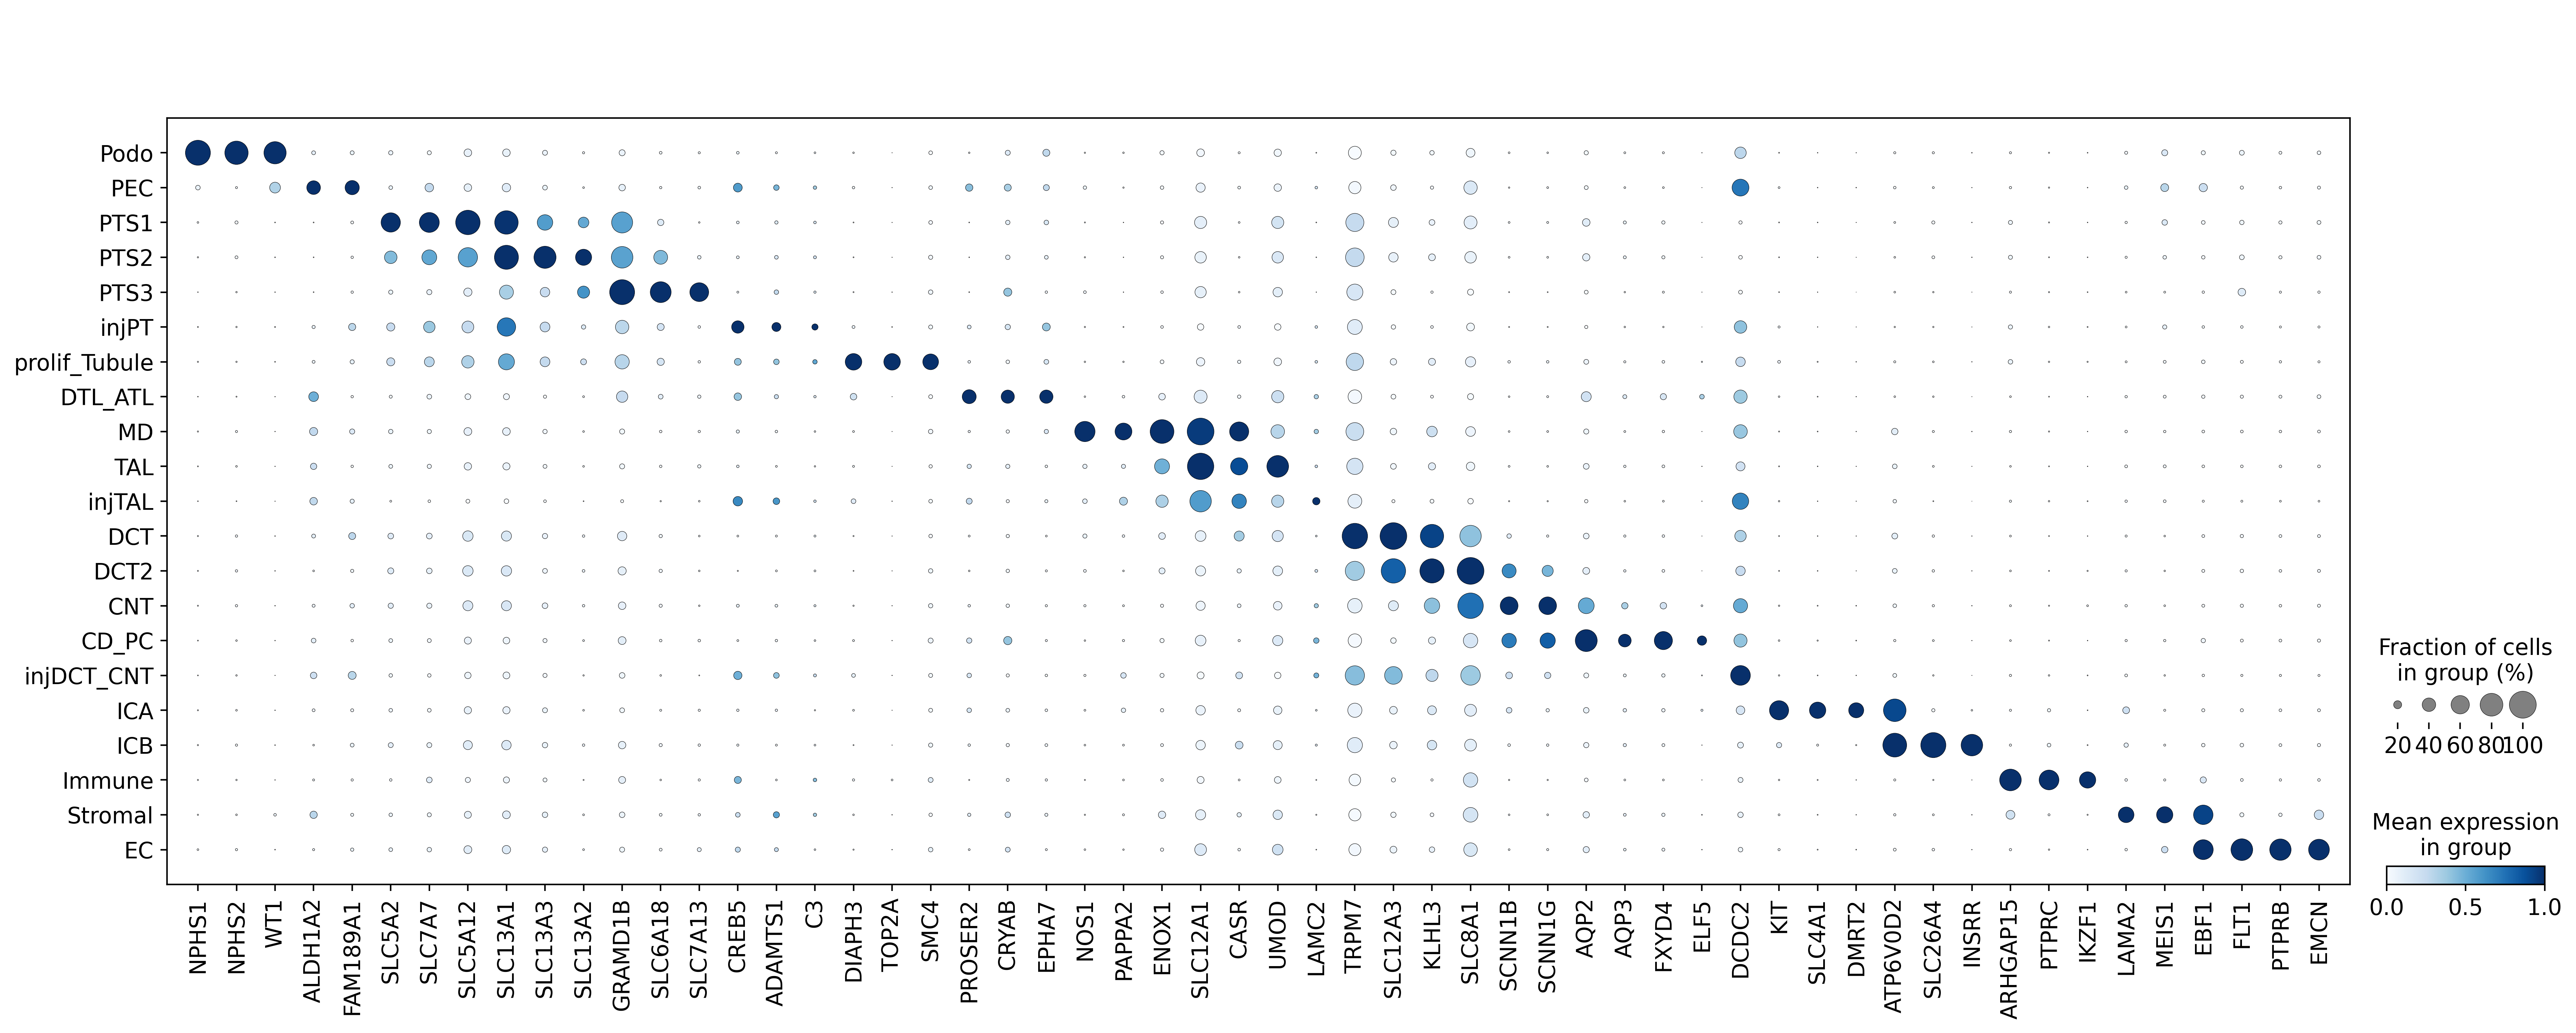

In [91]:
goi = ["NPHS1", "NPHS2", "WT1", "ALDH1A2", 
       "FAM189A1", "SLC5A2", "SLC7A7", 
       "SLC5A12", "SLC13A1", "SLC13A3", "SLC13A2", "GRAMD1B", "SLC6A18",
       "SLC7A13", "CREB5", "ADAMTS1", "C3", "DIAPH3", "TOP2A", 
       "SMC4", "PROSER2", "CRYAB", "EPHA7", "NOS1", "PAPPA2", "ENOX1", "SLC12A1", "CASR", 
       "UMOD", "LAMC2", "TRPM7", "SLC12A3", 
       "KLHL3", "SLC8A1", "SCNN1B", 
       "SCNN1G", "AQP2", "AQP3", "FXYD4", "ELF5", "DCDC2", "KIT", 
       "SLC4A1", "DMRT2", "ATP6V0D2", "SLC26A4", "INSRR", "ARHGAP15", "PTPRC", "IKZF1", "LAMA2", 
       "MEIS1", "EBF1", "FLT1", "PTPRB", "EMCN"]

#dot plot with marker genes
sc.pl.dotplot(
adata,
goi,
groupby='annotation_visualization',
dendrogram=False,
color_map="Blues",
swap_axes=False,
standard_scale="var",
categories_order = order
)

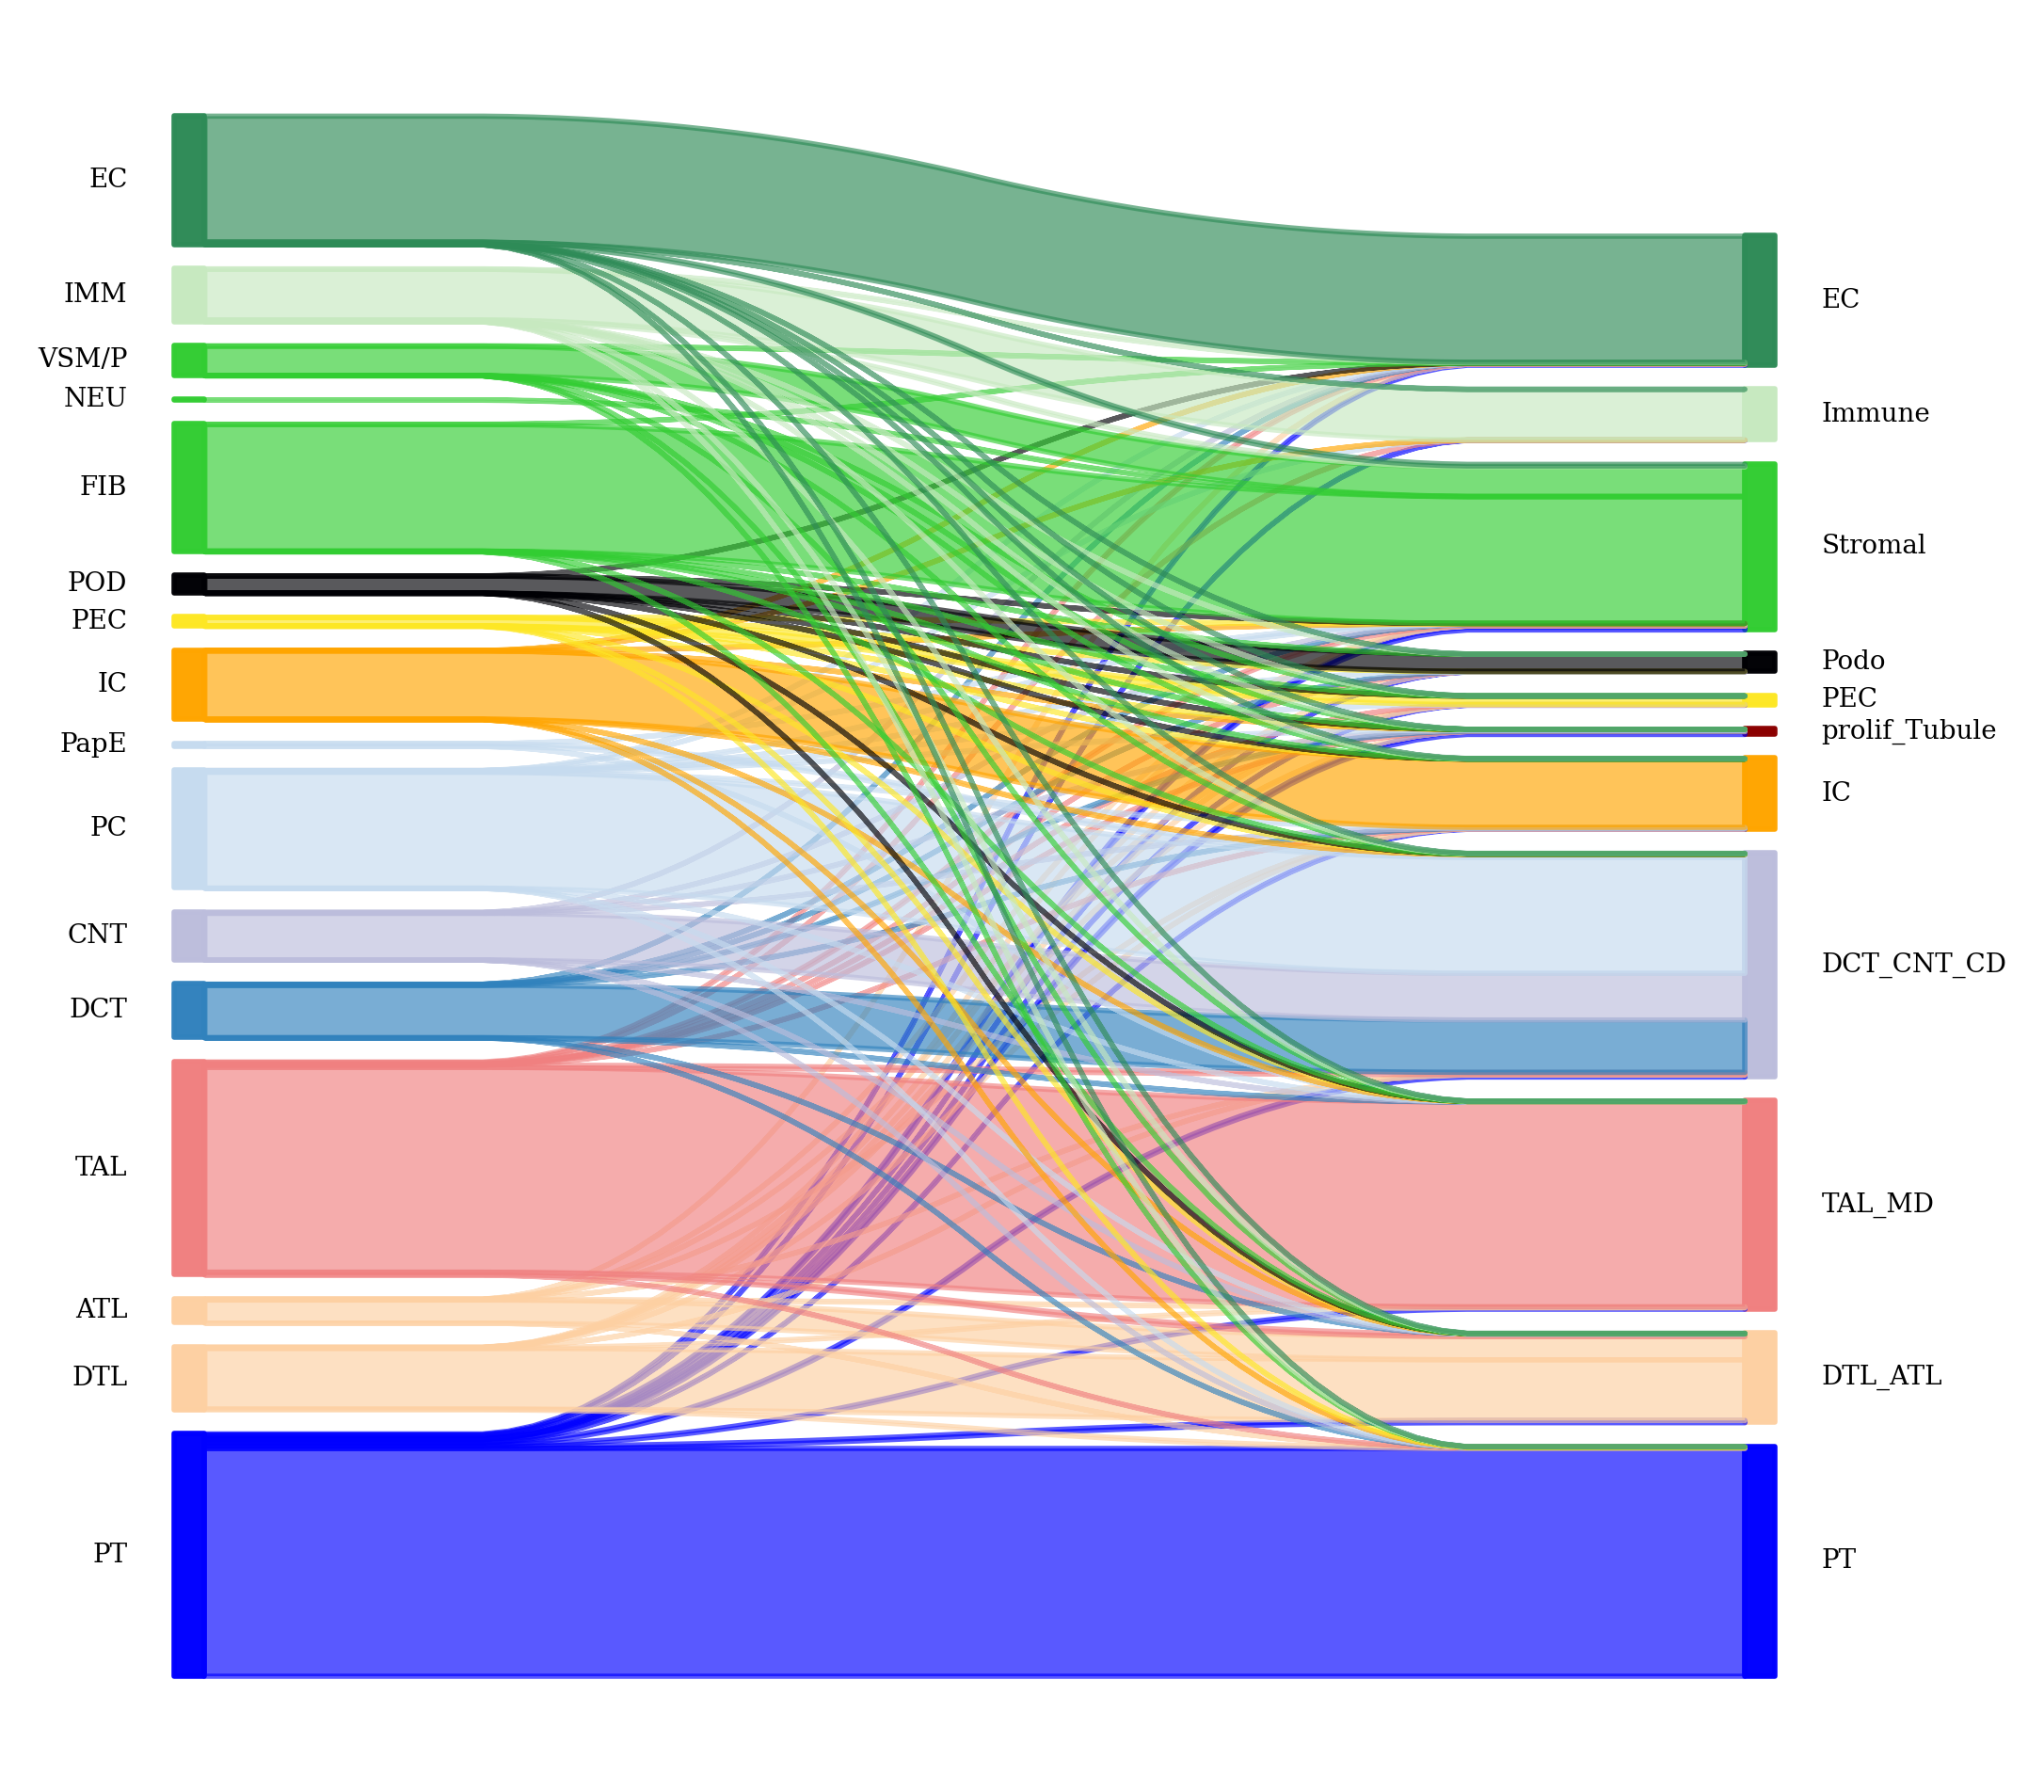

In [13]:
###Sankey: compare KPMP original annotation and new annotation 

adata_KPMP = adata[adata.obs.proj == "h_KPMP"]

# Add "" to the list of categories for the annotation column
#adata_KPMP.obs['annotation_Atlas_level3'].cat.add_categories(["unknown"], inplace=True)

#adata_KPMP.obs["annotation_Atlas_level3"] = adata_KPMP.obs["annotation_Atlas_level3"].fillna("unknown")

df = pd.DataFrame(adata_KPMP.obs, columns=["subclass.l1", "annotation_final_level1"])

df['sort_order1'] = df['subclass.l1'].map({'PT':1, 'FIB':12, 'NEU':13, 'VSM/P':14, 'TAL':4, 'IMM':15, 'IC':9,
'EC':16, 'DTL':2, 'POD':11, 'ATL':3, 'PC':7, 'CNT':6, 'DCT':5, 'PEC':10, 'PapE':8}).astype("float")

df['sort_order2'] = df['annotation_final_level1'].map({'TAL_MD':4, 'DCT_CNT_CD':5, 'PT':1,
'IC':6, 'prolif_Tubule':7, 'PEC':8, 'DTL_ATL':3, 'Podo':9, 'Stromal':10, 'Immune':11, 'EC':12}).astype("float") 

df = df.sort_values(["sort_order1", "sort_order2"])

colorDict = {'PT': 'blue', 'FIB': 'limegreen', 'TAL': 'lightcoral', 'IMM': '#c7e9c0', 'IC': 'orange',
             'EC': 'seagreen', 'DTL': '#fdd0a2', 'POD': '#000004', 'ATL': '#fdd0a2', 'PC': '#c6dbef',
             'CNT': '#bcbddc', 'DCT': '#3182bd', 'VSM/P': 'limegreen', 'PEC': '#fde725', 'NEU': 'limegreen', 'PapE': '#c6dbef',
             'TAL_MD': 'lightcoral', 'DCT_CNT_CD': '#bcbddc', 
             'Stromal': 'limegreen', 'Immune': '#c7e9c0', 
             'DTL_ATL': '#fdd0a2', 'Podo': '#000004', 'prolif_Tubule': 'darkred'}


sankey(df["subclass.l1"], df["annotation_final_level1"], aspect=20, fontsize=5, colorDict=colorDict)

In [6]:
#venndiagram from MetaMarker output

from matplotlib_venn import venn3, venn3_circles

%matplotlib inline

Text(0.5, 1.0, 'Shared Marker Genes')

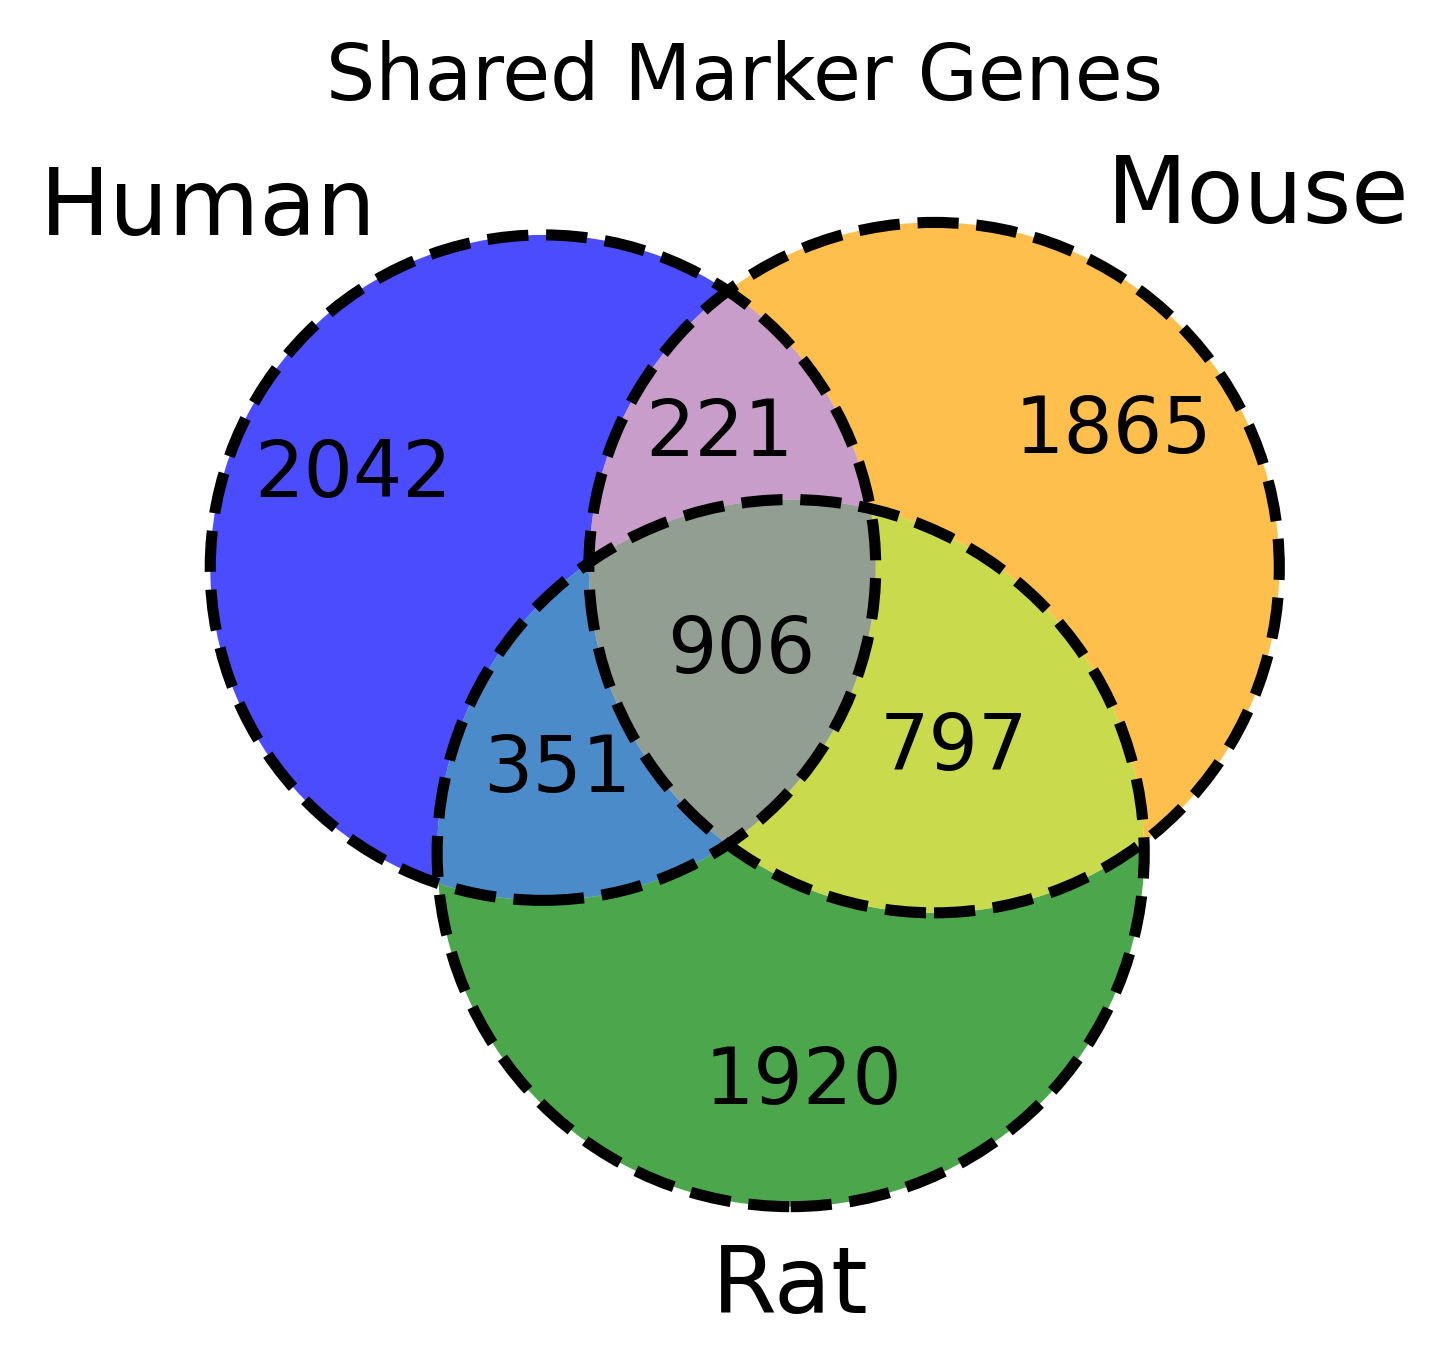

In [7]:
venn3(subsets = (2042, 1865, 221, 1920, 351, 797, 906), 
      set_labels = ('Human', 'Mouse', 'Rat'), 
      set_colors=('blue', 'orange', 'green'), alpha = 0.7)

venn3_circles(subsets = (2042, 1865, 221, 1920, 351, 797, 906), 
      linestyle='dashed', linewidth=2, color='k')
      

plt.title("Shared Marker Genes")


In [9]:
   #create crosstab for diagramm

species_celltype_percentage = pd.crosstab(adata.obs.disease, adata.obs.species)
species_celltype_percentage = (
    species_celltype_percentage.div(species_celltype_percentage.sum(axis=1), axis=0)
    * 100
)
print(species_celltype_percentage)                 

species       human      mouse        rat
disease                                  
diseased  21.135870  51.207739  27.656390
healthy   50.645121  23.245110  26.109769


In [10]:
celltypes = adata.obs["species"].unique().to_list()

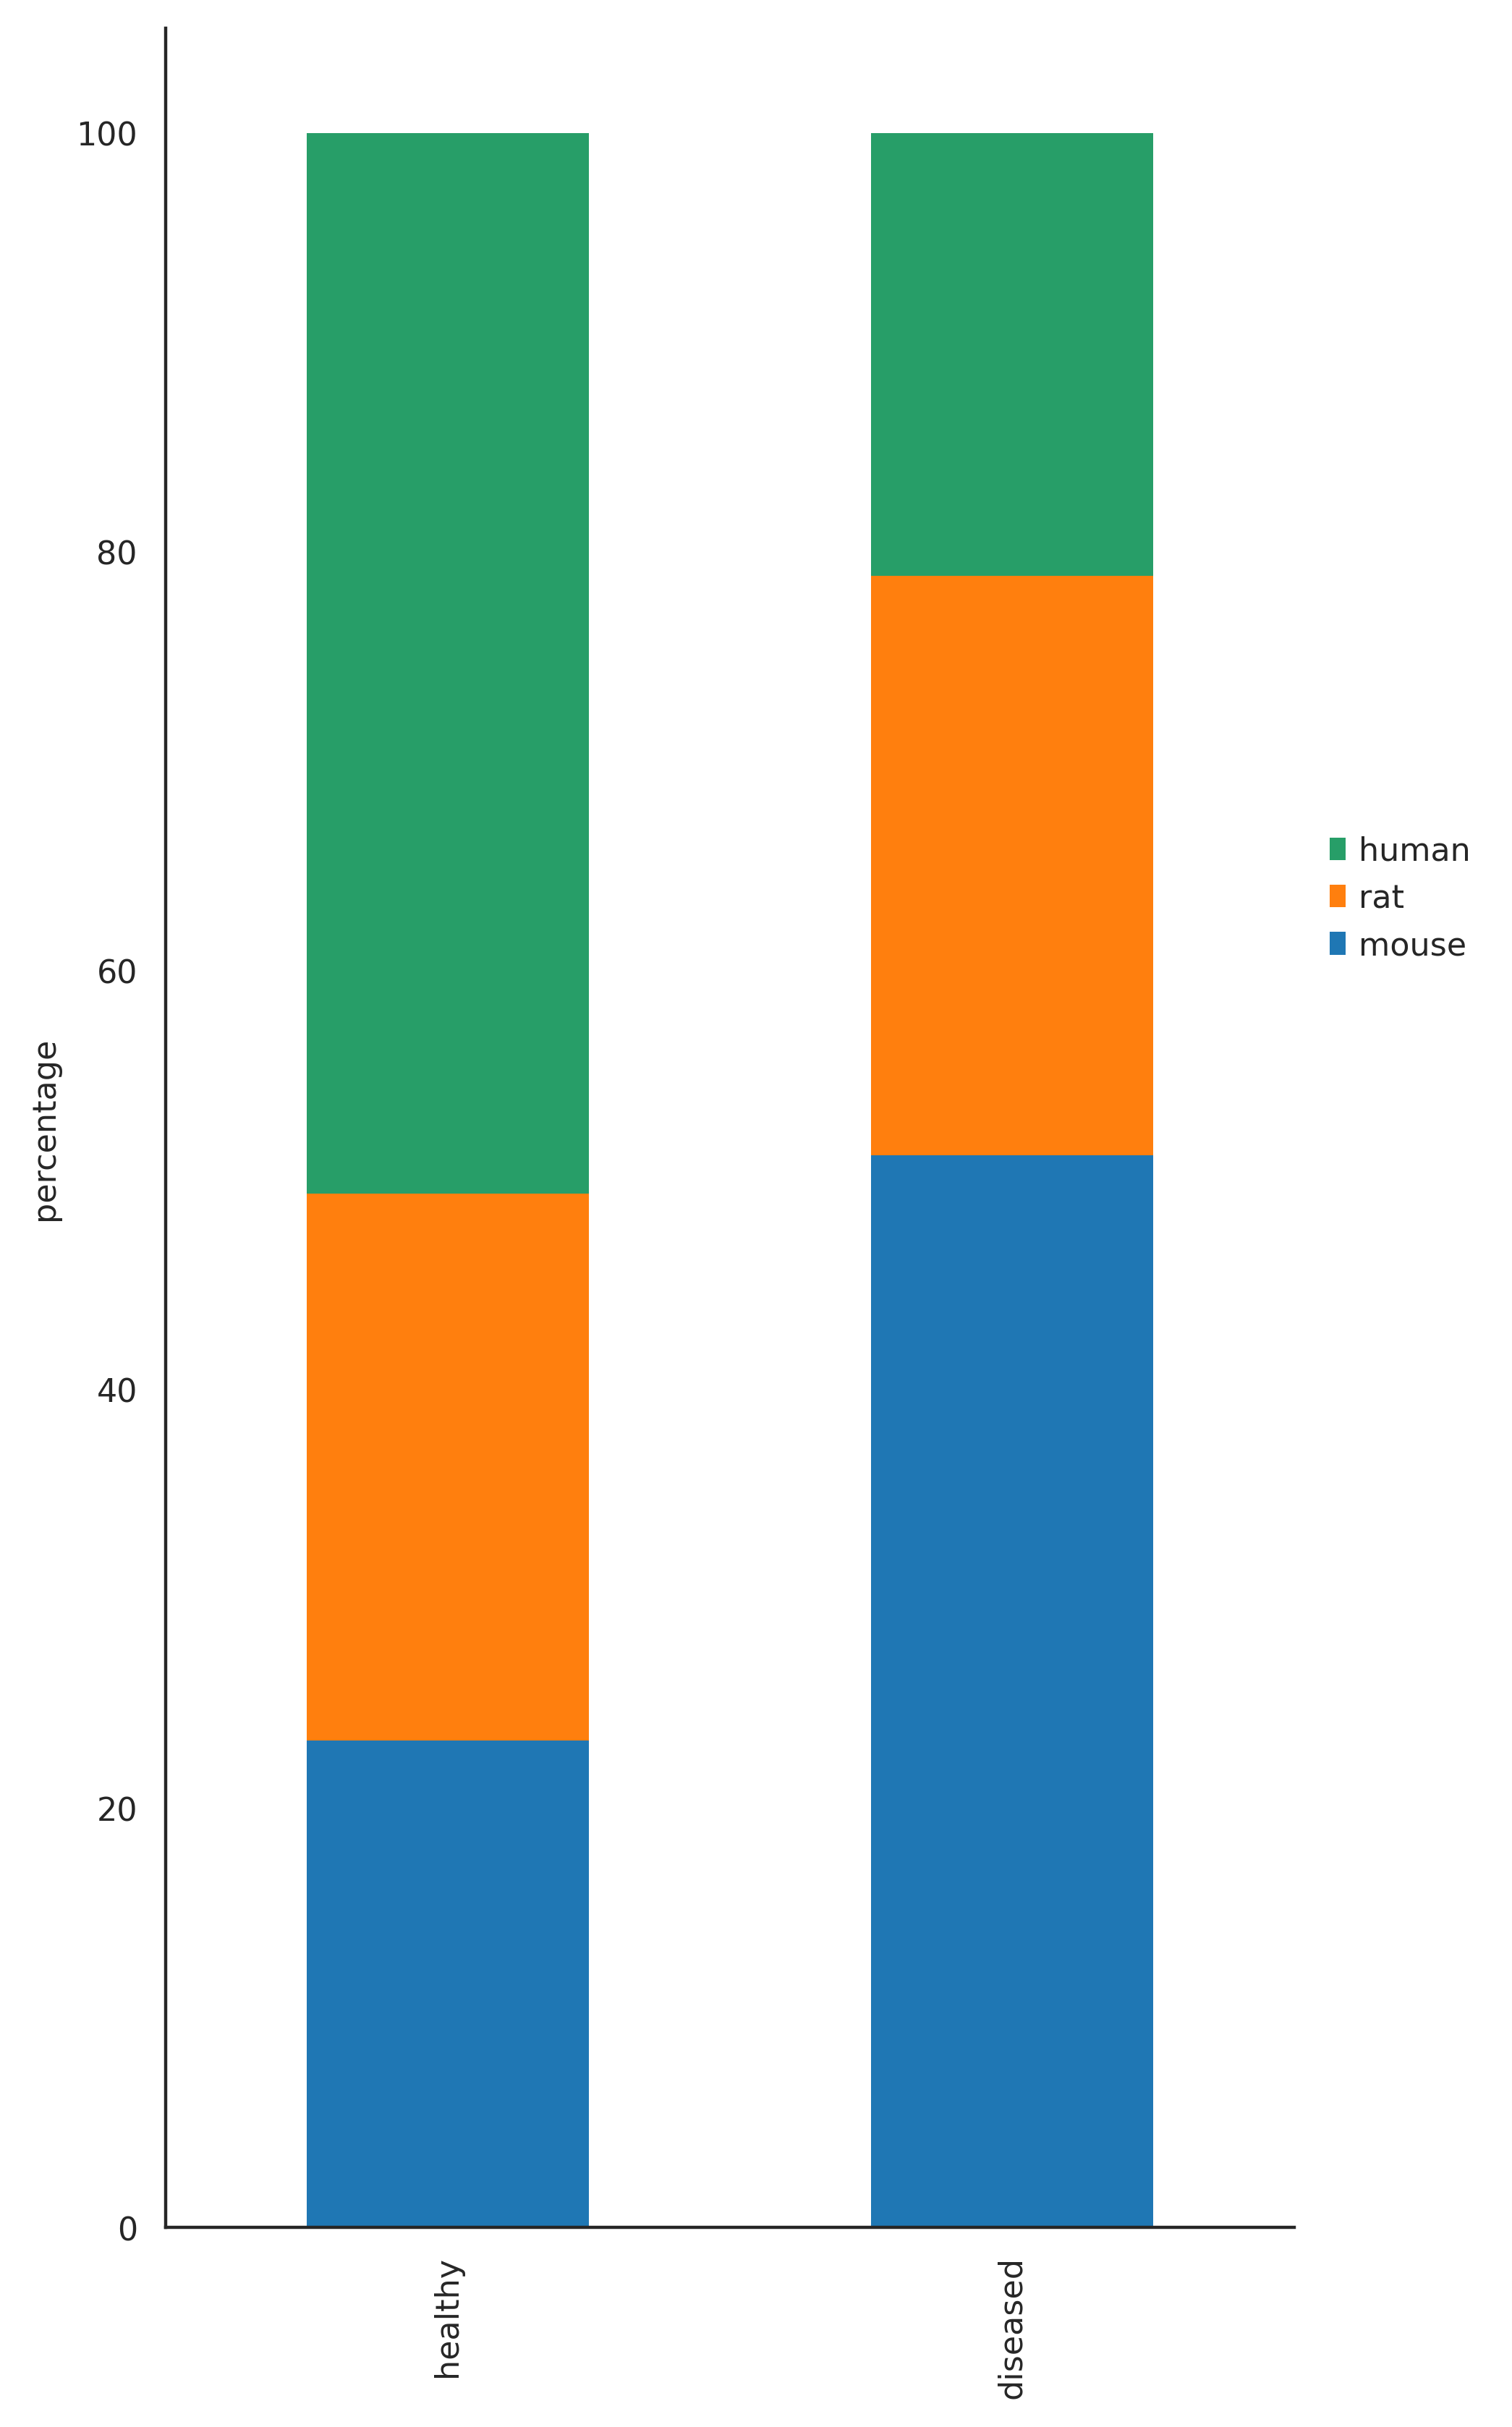

In [11]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

fz = 8
with plt.rc_context(
    {
        "figure.figsize": (5, 10),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    ax = species_celltype_percentage.loc[
        ["healthy", "diseased"], celltypes
    ].plot(
        kind="bar",
        stacked=True,
        edgecolor="none",
    )
    ax.tick_params(which="minor")
    plt.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc=(1.02, 0.57), fontsize=fz, frameon=False)
    plt.ylabel("percentage", fontsize=fz)
    plt.xlabel("", fontsize=fz)
    plt.yticks(np.arange(0, 101, 20), fontsize=fz)
    
plt.show()